<a href="https://colab.research.google.com/github/ecanteroa02/python/blob/main/ecanteroa02_el_definitivo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1. Introducción

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Vamos a hacer un modelo de probabilidad de lluvia con dataframe llamado "RainTomorrow"

# 2. Importar librerías

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
from sklearn.tree import export_graphviz
from sklearn.tree import export_text
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,roc_auc_score,roc_curve
import matplotlib.pyplot as plt
import math
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# 3. Importar conjunto de datos

In [3]:
df = pd.read_csv('/content/drive/MyDrive/examen_2.csv')

# 4. Análisis exploratorio de datos

*   Ver dimensiones del conjunto de datos
*   Previsualización del conjunto de datos

*   Ver propiedades estadísticas del conjunto de datos

In [4]:
df.shape

(14546, 22)

In [5]:
df.head()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,0,16.6,30.5,16.2,NaN,NaN,NE,31.0,E,NE,...,73.0,45.0,NaN,NaN,NaN,NaN,20.3,29.4,Yes,No
1,1,3.5,21.2,0.0,NaN,NaN,N,74.0,N,NW,...,68.0,43.0,NaN,NaN,NaN,NaN,12.0,15.1,No,No
2,2,9.1,13.8,0.0,1.6,NaN,NE,43.0,NNE,N,...,56.0,50.0,1017.9,1012.3,NaN,NaN,10.6,13.6,No,Yes
3,3,6.5,11.2,4.8,NaN,NaN,W,52.0,W,WSW,...,99.0,95.0,1010.4,1012.6,8.0,8.0,8.5,10.8,Yes,Yes
4,4,25.1,33.1,0.2,8.6,3.3,SSE,46.0,SSE,ESE,...,66.0,53.0,1011.5,1008.8,7.0,7.0,29.5,32.0,No,Yes


In [6]:
df.dtypes

Unnamed: 0         int64
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object

In [7]:
df.describe()

,Unnamed: 0,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,14546.000000,14417.000000,14426.000000,14227.000000,8273.000000,7584.000000,13512.000000,14376.000000,14243.000000,14295.000000,14137.000000,13021.000000,13024.000000,9051.000000,8709.000000,14384.000000,14220.000000
mean,7272.500000,12.261622,23.279703,2.378695,5.497317,7.626951,40.093028,14.053353,18.591097,68.560126,51.398882,1017.498932,1015.141460,4.433101,4.490297,17.051592,21.747743
std,4199.212843,6.427091,7.163605,8.217734,4.051951,3.790713,13.588919,8.939394,8.871940,19.129836,20.876594,7.153874,7.035546,2.890530,2.720447,6.520984,6.982979
min,0.000000,-7.600000,-3.200000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,1.000000,1.000000,982.900000,981.200000,0.000000,0.000000,-5.600000,-3.900000
25%,3636.250000,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.800000,1010.300000,1.000000,2.000000,12.300000,16.600000
50%,7272.500000,12.100000,22.800000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,69.000000,52.000000,1017.500000,1015.100000,5.000000,5.000000,16.700000,21.300000
75%,10908.750000,17.000000,28.400000,0.800000,7.400000,10.700000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.300000,1019.900000,7.000000,7.000000,21.700000,26.600000
max,14545.000000,29.800000,46.400000,216.300000,82.400000,14.500000,120.000000,65.000000,76.000000,100.000000,100.000000,1039.900000,1037.000000,8.000000,8.000000,38.200000,44.000000


In [8]:
df.isna().sum()

Unnamed: 0          0
MinTemp           129
MaxTemp           120
Rainfall          319
Evaporation      6273
Sunshine         6962
WindGustDir      1038
WindGustSpeed    1034
WindDir9am       1015
WindDir3pm        445
WindSpeed9am      170
WindSpeed3pm      303
Humidity9am       251
Humidity3pm       409
Pressure9am      1525
Pressure3pm      1522
Cloud9am         5495
Cloud3pm         5837
Temp9am           162
Temp3pm           326
RainToday         319
RainTomorrow      319
dtype: int64

<AxesSubplot:>

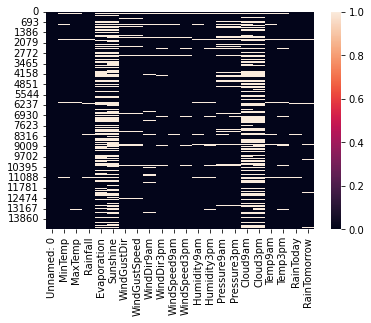

In [9]:
sns.heatmap(df.isnull())

In [10]:
ddf = df.drop('Unnamed: 0', axis=1)

In [11]:
dataa=ddf.dropna()
dataa

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
4,25.1,33.1,0.2,8.6,3.3,SSE,46.0,SSE,ESE,17.0,...,66.0,53.0,1011.5,1008.8,7.0,7.0,29.5,32.0,No,Yes
8,17.5,28.6,0.0,6.4,10.7,E,39.0,SE,ENE,17.0,...,48.0,42.0,1016.1,1013.0,1.0,1.0,24.8,28.1,No,No
10,5.3,12.8,3.8,0.4,5.6,SW,56.0,SSW,SSW,15.0,...,64.0,56.0,1004.6,1002.4,2.0,5.0,11.1,10.9,Yes,No
12,12.4,34.5,0.0,8.2,13.0,SW,44.0,SSW,SW,13.0,...,44.0,24.0,1008.9,1005.0,0.0,0.0,24.1,32.3,No,No
14,15.8,29.1,0.0,11.6,11.7,NE,39.0,SE,ENE,11.0,...,39.0,39.0,1018.0,1013.9,0.0,0.0,24.8,27.8,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,15.6,24.5,0.0,0.4,9.5,WNW,41.0,WSW,W,17.0,...,90.0,58.0,1011.9,1010.5,8.0,3.0,17.0,22.6,No,No
14537,21.6,29.9,0.0,7.2,4.9,SSW,48.0,WNW,S,9.0,...,82.0,86.0,1016.2,1014.6,7.0,6.0,23.7,24.2,No,Yes
14538,4.2,9.8,11.8,3.2,7.6,W,69.0,SSW,S,33.0,...,76.0,85.0,1010.5,1013.2,8.0,8.0,7.5,6.2,Yes,Yes
14539,16.4,26.6,0.0,5.4,10.8,ENE,19.0,SSW,ENE,6.0,...,66.0,51.0,1020.8,1018.1,2.0,1.0,22.1,25.5,No,No


##Outliers de MinTemp

In [12]:
Q1 = np.quantile (dataa['MinTemp'],0.25)
Q1

8.7

In [13]:
Q3 = np.quantile (dataa['MinTemp'],0.75)
Q3

18.6

In [14]:
IQR=Q3-Q1

In [15]:
sup=Q3+1.5*IQR
print(sup)

33.45


In [16]:
inf=Q1-1.5*IQR
print(inf)

-6.150000000000004


In [17]:
v = np.array (dataa['MinTemp'])

In [18]:
inferior =np.where(dataa['MinTemp'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([4328]),)


In [19]:
superior = np.where(dataa['MinTemp'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de MaxTemp

In [20]:
Q1=np.quantile(dataa['MaxTemp'],0.25)
Q1

18.8

In [21]:
Q3=np.quantile(dataa['MaxTemp'],0.75)
Q3

29.7

In [22]:
IQR=Q3-Q1

In [23]:
sup=Q3+1.5*IQR
print(sup)

46.05


In [24]:
inf=Q1-1.5*IQR
print(inf)

2.450000000000003


In [25]:
v=np.array(dataa['MaxTemp'])

In [26]:
inferior =np.where(dataa['MaxTemp'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [27]:
superior = np.where(dataa['MaxTemp'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de Rainfall

In [28]:
Q1=np.quantile(dataa['Rainfall'],0.25)
Q1

0.0

In [29]:
Q3=np.quantile(dataa['Rainfall'],0.75)
Q3

0.8

In [30]:
IQR=Q3-Q1

In [31]:
sup=Q3+1.5*IQR
print(sup)

2.0


In [32]:
inf=Q1-1.5*IQR
print(inf)

-1.2000000000000002


In [33]:
v=np.array(dataa['Rainfall'])

In [34]:
inferior =np.where(dataa['Rainfall'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [35]:
superior = np.where(dataa['Rainfall'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([   2,    9,   13, ..., 5669, 5676, 5678]),)


##Outliers de Evaporation

In [36]:
Q1=np.quantile(dataa['Evaporation'],0.25)
Q1

2.8

In [37]:
Q3=np.quantile(dataa['Evaporation'],0.75)
Q3

7.6

In [38]:
IQR=Q3-Q1

In [39]:
sup=Q3+1.5*IQR
print(sup)

14.799999999999999


In [40]:
inf=Q1-1.5*IQR
print(inf)

-4.3999999999999995


In [41]:
v=np.array(dataa['Rainfall'])

In [42]:
inferior =np.where(dataa['Rainfall'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [43]:
superior = np.where(dataa['Rainfall'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([  33,  137,  169,  185,  195,  202,  210,  271,  278,  314,  332,
        364,  406,  413,  469,  491,  495,  497,  510,  522,  533,  547,
        591,  597,  610,  625,  666,  675,  696,  710,  717,  766,  780,
        810,  812,  824,  828,  856,  881,  932,  952,  982, 1009, 1023,
       1058, 1062, 1068, 1087, 1093, 1111, 1118, 1130, 1151, 1162, 1209,
       1215, 1225, 1227, 1249, 1268, 1293, 1295, 1305, 1340, 1364, 1515,
       1560, 1570, 1584, 1603, 1621, 1713, 1717, 1757, 1780, 1793, 1802,
       1815, 1831, 1846, 1853, 1860, 1888, 1915, 1968, 1975, 1982, 1986,
       1997, 2005, 2038, 2062, 2063, 2069, 2078, 2101, 2147, 2193, 2308,
       2321, 2345, 2357, 2361, 2380, 2398, 2406, 2430, 2470, 2477, 2491,
       2502, 2531, 2546, 2554, 2569, 2654, 2660, 2689, 2724, 2742, 2762,
       2773, 2777, 2783, 2790, 2791, 2808, 2843, 2845, 2859, 2885, 2920,
       2962, 2973, 2976, 3031, 3055, 3082, 3134, 3140, 3190, 3229, 3273,
       3282, 3312, 3319, 3327, 33

##Outliers de Sunshine

In [44]:
Q1=np.quantile(dataa['Sunshine'],0.25)
Q1

5.1

In [45]:
Q3=np.quantile(dataa['Sunshine'],0.75)
Q3

10.7

In [46]:
IQR=Q3-Q1

In [47]:
sup=Q3+1.5*IQR
print(sup)

19.099999999999998


In [48]:
inf=Q1-1.5*IQR
print(inf)

-3.299999999999999


In [49]:
v=np.array(dataa['Sunshine'])

In [50]:
inferior =np.where(dataa['Sunshine'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [51]:
superior = np.where(dataa['Sunshine'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de WindGustSpeed

In [52]:
Q1=np.quantile(dataa['WindGustSpeed'],0.25)
Q1

31.0

In [53]:
Q3=np.quantile(dataa['WindGustSpeed'],0.75)
Q3

48.0

In [54]:
IQR=Q3-Q1

In [55]:
sup=Q3+1.5*IQR
print(sup)

73.5


In [56]:
inf=Q1-1.5*IQR
print(inf)

5.5


In [57]:
v=np.array(dataa['WindGustSpeed'])

In [58]:
inferior =np.where(dataa['WindGustSpeed'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [59]:
superior = np.where(dataa['WindGustSpeed'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([  51,   80,   97,  114,  150,  229,  230,  356,  422,  438,  449,
        578,  654,  719,  784,  903,  906,  926,  963,  980, 1019, 1058,
       1068, 1090, 1132, 1209, 1237, 1245, 1249, 1272, 1340, 1381, 1426,
       1433, 1484, 1532, 1567, 1775, 1799, 1832, 1841, 1860, 1935, 1994,
       2049, 2058, 2068, 2116, 2117, 2271, 2357, 2378, 2398, 2421, 2448,
       2454, 2479, 2551, 2553, 2590, 2695, 2697, 2742, 2790, 2792, 2832,
       2836, 2858, 3044, 3049, 3167, 3190, 3270, 3286, 3465, 3495, 3518,
       3537, 3571, 3592, 3627, 3638, 3644, 3654, 3670, 3702, 3719, 3731,
       3777, 3778, 3782, 3820, 3829, 3887, 4038, 4104, 4147, 4177, 4313,
       4369, 4384, 4475, 4530, 4541, 4568, 4608, 4638, 4643, 4734, 4794,
       4804, 4854, 4976, 4978, 5023, 5115, 5148, 5214, 5268, 5285, 5346,
       5363, 5380, 5415, 5421, 5446, 5453, 5459, 5635, 5636, 5673]),)


##Outliers de WindSpeed9am

In [60]:
Q1=np.quantile(dataa['WindSpeed9am'],0.25)
Q1

9.0

In [61]:
Q3=np.quantile(dataa['WindSpeed9am'],0.75)
Q3

20.0

In [62]:
IQR=Q3-Q1

In [63]:
sup=Q3+1.5*IQR
print(sup)

36.5


In [64]:
inf=Q1-1.5*IQR
print(inf)

-7.5


In [65]:
v=np.array(dataa['WindSpeed9am'])

In [66]:
inferior =np.where(dataa['WindSpeed9am'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [67]:
superior = np.where(dataa['WindSpeed9am'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([  80,  134,  150,  356,  422,  466,  502,  508,  519,  547,  562,
        594,  661,  669,  854,  870,  882,  906,  946,  980, 1019, 1068,
       1090, 1112, 1200, 1209, 1229, 1237, 1340, 1377, 1380, 1386, 1466,
       1484, 1532, 1567, 1786, 1799, 1802, 1810, 1841, 1863, 1886, 1919,
       1957, 1994, 2058, 2142, 2177, 2267, 2270, 2271, 2278, 2357, 2375,
       2448, 2469, 2491, 2551, 2588, 2792, 2836, 3001, 3042, 3044, 3049,
       3053, 3167, 3190, 3270, 3286, 3298, 3414, 3428, 3465, 3518, 3537,
       3592, 3627, 3638, 3682, 3782, 3829, 3985, 4104, 4120, 4122, 4131,
       4147, 4177, 4200, 4213, 4338, 4384, 4388, 4398, 4416, 4515, 4559,
       4638, 4687, 4696, 4733, 4744, 4898, 4931, 4958, 5023, 5024, 5067,
       5081, 5189, 5274, 5285, 5346, 5417, 5459, 5526, 5559, 5588, 5673]),)


##Outliers de WindSpeed3pm

In [68]:
Q1=np.quantile(dataa['WindSpeed3pm'],0.25)
Q1

13.0

In [69]:
Q3=np.quantile(dataa['WindSpeed3pm'],0.75)
Q3

26.0

In [70]:
IQR=Q3-Q1

In [71]:
sup=Q3+1.5*IQR
print(sup)

45.5


In [72]:
inf=Q1-1.5*IQR
print(inf)

-6.5


In [73]:
v=np.array(dataa['WindSpeed3pm'])

In [74]:
inferior =np.where(dataa['WindSpeed3pm'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [75]:
superior = np.where(dataa['WindSpeed3pm'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([ 230,  422,  877,  903,  980, 1090, 1340, 1410, 1426, 1567, 2278,
       2421, 2695, 2777, 2836, 2858, 3044, 3377, 3465, 3592, 3719, 3887,
       3928, 4104, 4122, 4177, 4231, 4313, 4369, 4384, 4475, 4587, 4638,
       4978, 5115, 5421, 5559, 5588, 5673]),)


##Outliers de Humidity9am

In [76]:
Q1=np.quantile(dataa['Humidity9am'],0.25)
Q1

54.0

In [77]:
Q3=np.quantile(dataa['Humidity9am'],0.75)
Q3

79.0

In [78]:
IQR=Q3-Q1

In [79]:
sup=Q3+1.5*IQR
print(sup)

116.5


In [80]:
inf=Q1-1.5*IQR
print(inf)

16.5


In [81]:
v=np.array(dataa['Humidity9am'])

In [82]:
inferior =np.where(dataa['Humidity9am'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([ 111,  125,  204,  424,  432,  748, 1027, 1076, 1107, 1138, 1229,
       1240, 1245, 1417, 1525, 1587, 1631, 1673, 1905, 1928, 1987, 2080,
       2167, 2341, 2468, 2558, 2567, 2626, 2682, 2695, 2744, 2810, 2817,
       2820, 3153, 3463, 3466, 3556, 3605, 3732, 3749, 3762, 3845, 3887,
       4195, 4211, 4271, 4378, 4549, 4745, 4761, 4798, 4991, 5015, 5084,
       5111, 5153, 5155, 5278, 5421, 5443, 5523, 5559, 5630, 5658]),)


In [83]:
superior = np.where(dataa['Humidity9am'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de Humidity3pm

In [84]:
Q1=np.quantile(dataa['Humidity3pm'],0.25)
Q1

35.0

In [85]:
Q3=np.quantile(dataa['Humidity3pm'],0.75)
Q3

63.0

In [86]:
IQR=Q3-Q1

In [87]:
sup=Q3+1.5*IQR
print(sup)

105.0


In [88]:
inf=Q1-1.5*IQR
print(inf)

-7.0


In [89]:
v=np.array(dataa['Humidity3pm'])

In [90]:
inferior =np.where(dataa['Humidity3pm'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [91]:
superior = np.where(dataa['Humidity3pm'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de Pressure9am

In [92]:
Q1=np.quantile(dataa['Pressure9am'],0.25)
Q1

1012.5

In [93]:
Q3=np.quantile(dataa['Pressure9am'],0.75)
Q3

1021.6

In [94]:
IQR=Q3-Q1

In [95]:
sup=Q3+1.5*IQR
print(sup)

1035.25


In [96]:
inf=Q1-1.5*IQR
print(inf)

998.8499999999999


In [97]:
v=np.array(dataa['Pressure9am'])

In [98]:
inferior =np.where(dataa['Pressure9am'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([ 149,  480,  591,  732,  875,  907,  952, 1143, 1302, 1652, 1897,
       1972, 2035, 2068, 2069, 2265, 2858, 3049, 3301, 3518, 3592, 3638,
       3644, 3682, 3731, 3820, 4396, 4490, 4533, 4643, 4778, 4897, 4922,
       5067, 5214, 5453, 5599]),)


In [99]:
superior = np.where(dataa['Pressure9am'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([  63,  131,  159,  200, 1085, 1362, 1395, 1408, 1528, 1607, 1925,
       1985, 2207, 2243, 2679, 2764, 3118, 3503, 3843, 4107, 4354, 4783]),)


##Outliers de Pressure3pm

In [100]:
Q1=np.quantile(dataa['Pressure3pm'],0.25)
Q1

1009.9

In [101]:
Q3=np.quantile(dataa['Pressure3pm'],0.75)
Q3

1019.3

In [102]:
IQR=Q3-Q1

In [103]:
sup=Q3+1.5*IQR
print(sup)

1033.3999999999999


In [104]:
inf=Q1-1.5*IQR
print(inf)

995.8


In [105]:
v=np.array(dataa['Pressure3pm'])

In [106]:
inferior =np.where(dataa['Pressure3pm'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([ 149,  480,  591,  875,  884, 1143, 1302, 1652, 1897, 2068, 3518,
       3592, 3644, 4490, 4533, 4897, 4922, 5453, 5599]),)


In [107]:
superior = np.where(dataa['Pressure9am'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([  63,  120,  131,  159,  200,  494,  678,  682, 1085, 1273, 1362,
       1395, 1408, 1528, 1607, 1798, 1804, 1925, 1985, 2207, 2243, 2307,
       2635, 2679, 2707, 2764, 2816, 2873, 3118, 3191, 3447, 3486, 3503,
       3626, 3812, 3834, 3843, 4107, 4130, 4300, 4354, 4558, 4717, 4783,
       4800, 4885, 4891, 4924, 5134, 5181, 5337, 5505, 5659]),)


##Outliers de Cloud9am

In [108]:
Q1=np.quantile(dataa['Cloud9am'],0.25)
Q1

1.0

In [109]:
Q3=np.quantile(dataa['Cloud9am'],0.75)
Q3

7.0

In [110]:
IQR=Q3-Q1

In [111]:
sup=Q3+1.5*IQR
print(sup)

16.0


In [112]:
inf=Q1-1.5*IQR
print(inf)

-8.0


In [113]:
v=np.array(dataa['Cloud9am'])

In [114]:
inferior =np.where(dataa['Cloud9am'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [115]:
superior = np.where(dataa['Cloud9am'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de Cloud3pm

In [116]:
Q1=np.quantile(dataa['Cloud3pm'],0.25)
Q1

2.0

In [117]:
Q3=np.quantile(dataa['Cloud3pm'],0.75)
Q3

7.0

In [118]:
IQR=Q3-Q1

In [119]:
sup=Q3+1.5*IQR
print(sup)

14.5


In [120]:
inf=Q1-1.5*IQR
print(inf)

-5.5


In [121]:
v=np.array(dataa['Cloud3pm'])

In [122]:
inferior =np.where(dataa['Cloud3pm'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [123]:
superior = np.where(dataa['Cloud3pm'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de Temp9am

In [124]:
Q1=np.quantile(dataa['Temp9am'],0.25)
Q1

13.2

In [125]:
Q3=np.quantile(dataa['Temp9am'],0.75)
Q3

23.45

In [126]:
IQR=Q3-Q1

In [127]:
sup=Q3+1.5*IQR
print(sup)

38.825


In [128]:
inf=Q1-1.5*IQR
print(inf)

-2.1750000000000007


In [129]:
v=np.array(dataa['Temp9am'])

In [130]:
inferior =np.where(dataa['Temp9am'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [131]:
superior = np.where(dataa['Temp9am'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


##Outliers de Temp3pm

In [132]:
Q1=np.quantile(dataa['Temp3pm'],0.25)
Q1

17.5

In [133]:
Q3=np.quantile(dataa['Temp3pm'],0.75)
Q3

28.0

In [134]:
IQR=Q3-Q1

In [135]:
sup=Q3+1.5*IQR
print(sup)

43.75


In [136]:
inf=Q1-1.5*IQR
print(inf)

1.75


In [137]:
v=np.array(dataa['Temp3pm'])

In [138]:
inferior =np.where(dataa['Temp3pm'] <= (Q1-1.5*IQR))
print("limite inferior:", inferior)

limite inferior: (array([], dtype=int64),)


In [139]:
superior = np.where(dataa['Temp3pm'] >= (Q3+1.5*IQR))
print("limite superior:", superior)

limite superior: (array([], dtype=int64),)


# 5. Análisis univariado


*   Explorar la variable objetivo RainTomorrow
*   Resultados del Análisis Univariado

In [140]:
Rain=dataa.RainTomorrow
Rain

4        Yes
8         No
10        No
12        No
14        No
        ... 
14536     No
14537    Yes
14538    Yes
14539     No
14543    Yes
Name: RainTomorrow, Length: 5679, dtype: object

In [141]:
Rain.shape

(5679,)

In [142]:
Rain.describe

<bound method NDFrame.describe of 4        Yes
8         No
10        No
12        No
14        No
        ... 
14536     No
14537    Yes
14538    Yes
14539     No
14543    Yes
Name: RainTomorrow, Length: 5679, dtype: object>

In [143]:
Rain.isna().sum()

0

# 6. Análisis bivariado



*   Tipos de variables

*   Explorar variables categóricas

*   Resumen de variables categóricas

*   Explorar problemas dentro de variables categóricas
*   Explorar variables numéricas


*   Resumen de variables numéricas 


*   Explorar problemas dentro de variables numéricas


In [144]:
Rainf=dataa.Rainfall
Rainf

4         0.2
8         0.0
10        3.8
12        0.0
14        0.0
         ... 
14536     0.0
14537     0.0
14538    11.8
14539     0.0
14543     2.8
Name: Rainfall, Length: 5679, dtype: float64

In [145]:
Rainf.dtypes

dtype('float64')

In [146]:
Rain.dtypes

dtype('O')

In [147]:
Rainf.shape

(5679,)

In [148]:
Rainf.describe

<bound method NDFrame.describe of 4         0.2
8         0.0
10        3.8
12        0.0
14        0.0
         ... 
14536     0.0
14537     0.0
14538    11.8
14539     0.0
14543     2.8
Name: Rainfall, Length: 5679, dtype: float64>

In [149]:
Rainf.isna().sum()

0

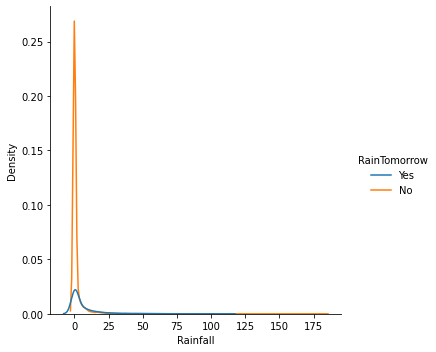

In [150]:
sns.displot(data=dataa, x="Rainfall", hue="RainTomorrow", kind="kde")

<AxesSubplot:ylabel='Rainfall'>

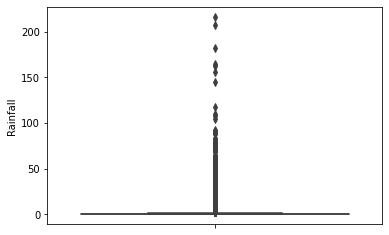

In [151]:
#sns.boxplot(x="Rainfall",y="RainTomorrow",data=dataa)
sns.boxplot(y =df['Rainfall'])


# 7. Análisis multivariado



*   Mapa de calor
*   Pairplot

In [152]:
dataaa=pd.get_dummies(dataa,drop_first=True)
dataaa

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes
4,25.1,33.1,0.2,8.6,3.3,46.0,17.0,24.0,66.0,53.0,...,0,0,0,0,0,0,0,0,0,1
8,17.5,28.6,0.0,6.4,10.7,39.0,17.0,26.0,48.0,42.0,...,0,0,0,0,0,0,0,0,0,0
10,5.3,12.8,3.8,0.4,5.6,56.0,15.0,15.0,64.0,56.0,...,0,0,0,1,0,0,0,0,1,0
12,12.4,34.5,0.0,8.2,13.0,44.0,13.0,31.0,44.0,24.0,...,0,0,0,0,1,0,0,0,0,0
14,15.8,29.1,0.0,11.6,11.7,39.0,11.0,30.0,39.0,39.0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14536,15.6,24.5,0.0,0.4,9.5,41.0,17.0,26.0,90.0,58.0,...,0,0,0,0,0,1,0,0,0,0
14537,21.6,29.9,0.0,7.2,4.9,48.0,9.0,26.0,82.0,86.0,...,1,0,0,0,0,0,0,0,0,1
14538,4.2,9.8,11.8,3.2,7.6,69.0,33.0,24.0,76.0,85.0,...,1,0,0,0,0,0,0,0,1,1
14539,16.4,26.6,0.0,5.4,10.8,19.0,6.0,9.0,66.0,51.0,...,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

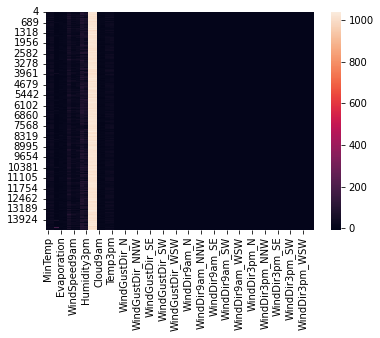

In [153]:
sns.heatmap(dataaa)

# 8. Declarar vector de variables predictoras y variable objetivo

In [154]:
code=pd.concat([dataaa,Rain], axis=1)
code.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,RainToday_Yes,RainTomorrow_Yes,RainTomorrow
4,25.1,33.1,0.2,8.6,3.3,46.0,17.0,24.0,66.0,53.0,...,0,0,0,0,0,0,0,0,1,Yes
8,17.5,28.6,0.0,6.4,10.7,39.0,17.0,26.0,48.0,42.0,...,0,0,0,0,0,0,0,0,0,No
10,5.3,12.8,3.8,0.4,5.6,56.0,15.0,15.0,64.0,56.0,...,0,0,1,0,0,0,0,1,0,No
12,12.4,34.5,0.0,8.2,13.0,44.0,13.0,31.0,44.0,24.0,...,0,0,0,1,0,0,0,0,0,No
14,15.8,29.1,0.0,11.6,11.7,39.0,11.0,30.0,39.0,39.0,...,0,0,0,0,0,0,0,0,0,No


# 9. Dividir datos en conjunto de entrenamiento y prueba

In [155]:
features=dataaa.iloc[:, :10]
target=dataaa['RainTomorrow_Yes']
features, target

(       MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
 4         25.1     33.1       0.2          8.6       3.3           46.0   
 8         17.5     28.6       0.0          6.4      10.7           39.0   
 10         5.3     12.8       3.8          0.4       5.6           56.0   
 12        12.4     34.5       0.0          8.2      13.0           44.0   
 14        15.8     29.1       0.0         11.6      11.7           39.0   
 ...        ...      ...       ...          ...       ...            ...   
 14536     15.6     24.5       0.0          0.4       9.5           41.0   
 14537     21.6     29.9       0.0          7.2       4.9           48.0   
 14538      4.2      9.8      11.8          3.2       7.6           69.0   
 14539     16.4     26.6       0.0          5.4      10.8           19.0   
 14543     23.9     33.0       2.8          2.0       6.7           54.0   
 
        WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  
 4              17.0   

In [156]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2)

# 10. Ingeniería de características



*   Ingienería de valores perdidos en variables numéricas

*   Ingienería de valores perdidos en variables categóricas
*   Ingienería de valores atípicos en variables numéricas


*   Codificar variables categóricas


# 11. Escalado de características 

In [157]:
scaler = MinMaxScaler()

In [158]:
df_code_scal = scaler.fit_transform(dataaa)

# 12. Entrenamiento del modelo

In [159]:
mi_arbol=DecisionTreeClassifier(max_depth=4,criterion='entropy',class_weight='balanced',splitter='best')

# 13. Predecir resultados

In [160]:
mi_arbol=mi_arbol.fit(X_test,y_test)

In [161]:
y_pred=mi_arbol.predict(X_test)

In [162]:
print(f"Profundidad del árbol: {mi_arbol.get_depth()}")
print(f"Número de nodos terminales: {mi_arbol.get_n_leaves()}")

Profundidad del árbol: 4
Número de nodos terminales: 16


In [163]:
texto_modelo = export_text(
                    decision_tree = mi_arbol,
                    feature_names = list(features.columns)
               )
print(texto_modelo)

|--- Humidity3pm <= 63.50
|   |--- Sunshine <= 6.85
|   |   |--- WindGustSpeed <= 43.50
|   |   |   |--- MaxTemp <= 30.75
|   |   |   |   |--- class: 0
|   |   |   |--- MaxTemp >  30.75
|   |   |   |   |--- class: 1
|   |   |--- WindGustSpeed >  43.50
|   |   |   |--- Humidity3pm <= 34.00
|   |   |   |   |--- class: 0
|   |   |   |--- Humidity3pm >  34.00
|   |   |   |   |--- class: 1
|   |--- Sunshine >  6.85
|   |   |--- Humidity3pm <= 53.50
|   |   |   |--- Sunshine <= 8.25
|   |   |   |   |--- class: 0
|   |   |   |--- Sunshine >  8.25
|   |   |   |   |--- class: 0
|   |   |--- Humidity3pm >  53.50
|   |   |   |--- WindGustSpeed <= 51.00
|   |   |   |   |--- class: 0
|   |   |   |--- WindGustSpeed >  51.00
|   |   |   |   |--- class: 1
|--- Humidity3pm >  63.50
|   |--- Humidity3pm <= 74.50
|   |   |--- Evaporation <= 1.90
|   |   |   |--- Evaporation <= 0.50
|   |   |   |   |--- class: 1
|   |   |   |--- Evaporation >  0.50
|   |   |   |   |--- class: 0
|   |   |--- Evaporation > 

In [186]:
print(f"Profundidad del árbol: {mi_arbol.get_depth()}")
print(f"Número de nodos terminales: {mi_arbol.get_n_leaves()}")

Profundidad del árbol: 4
Número de nodos terminales: 16


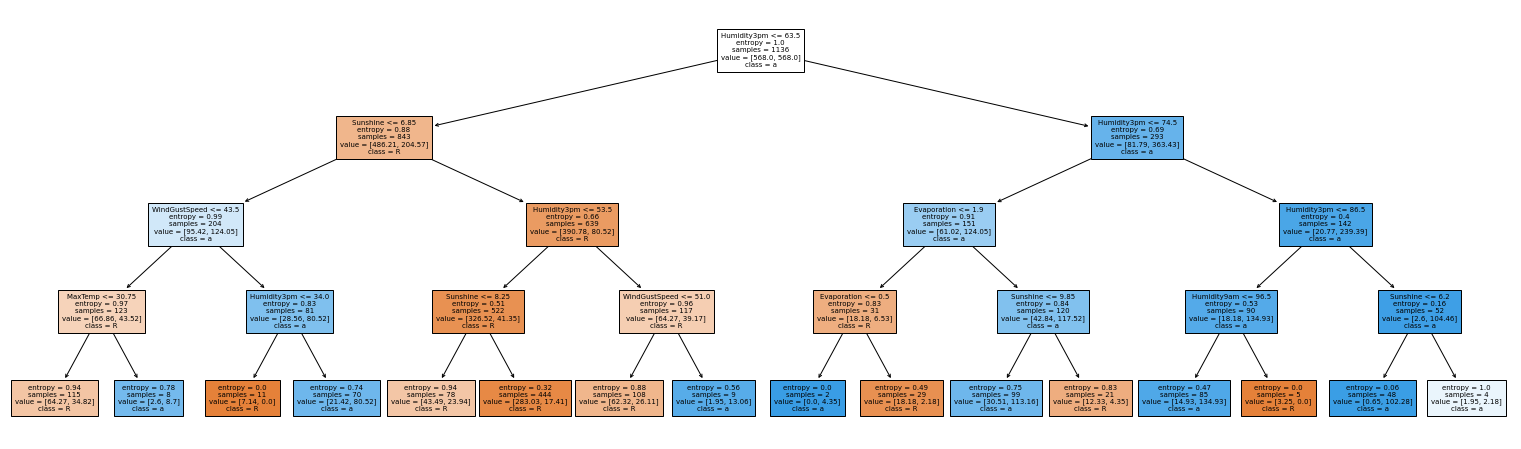

In [198]:
fig, ax = plt.subplots(figsize=(27, 8))
plot = plot_tree (decision_tree = mi_arbol,feature_names = features.columns,class_names='RainTomorrow',filled = True,impurity =True,fontsize = 7,precision = 2,ax = ax)

# 14. Comprobar score de precisión


*   Comprobar *overfiting* y *underfiting*
*   Comparar la precisión del modelo con la precisión nula


In [164]:
mi_arbol.predict_proba(X_test)

array([[0.94205106, 0.05794894],
       [0.64858556, 0.35141444],
       [0.94205106, 0.05794894],
       ...,
       [0.94205106, 0.05794894],
       [0.09962989, 0.90037011],
       [0.94205106, 0.05794894]])

In [165]:
print(y_test.value_counts())

0    875
1    261
Name: RainTomorrow_Yes, dtype: int64


# 15. Matriz de confusión

In [166]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
MC = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    labels=None,
    normalize=None,
)

In [167]:
pd.DataFrame(
    confusion_matrix(
        y_true=y_test,
        y_pred=y_pred,
        labels=[1, 0],
        normalize=None,
    ),
    columns=["TP", "FN"],
    index=["T", "N"],
)

,TP,FN
T,211,50
N,114,761


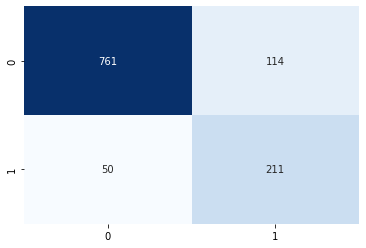

In [168]:
sns.heatmap(
    MC,
    cbar=False,
    cmap="Blues",
    annot=True,
    fmt="d",
)
plt.show()

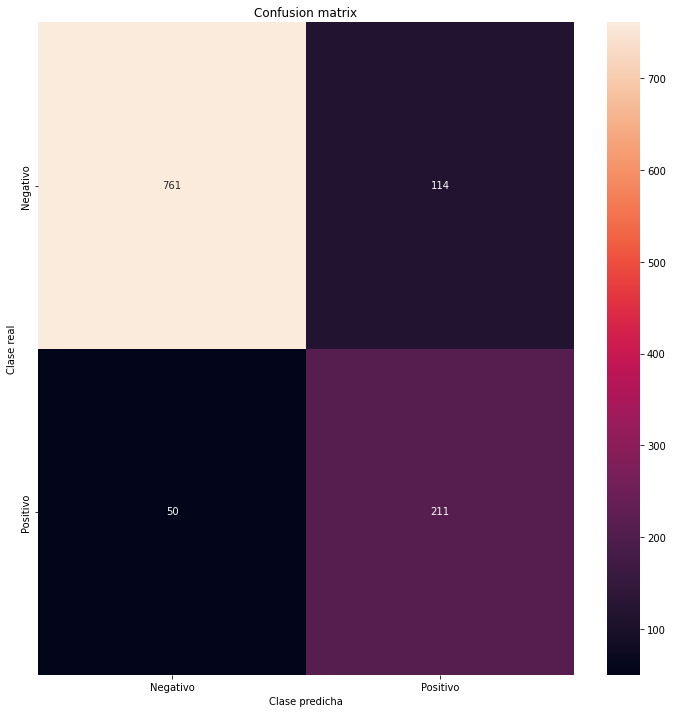

              precision    recall  f1-score   support

           0       0.94      0.87      0.90       875
           1       0.65      0.81      0.72       261

    accuracy                           0.86      1136
   macro avg       0.79      0.84      0.81      1136
weighted avg       0.87      0.86      0.86      1136



In [169]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = mi_arbol.predict(X_test)
mostrar_resultados(y_test, y_pred)

# 16. Métricas de clasificación



*   Informe de clasificación

*   Precisión

*   Recall
*   F1-score


*   Support




In [170]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.8556338028169014


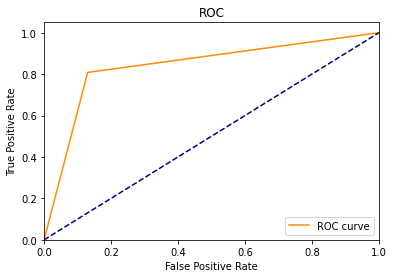

In [171]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [172]:
roc_auc_score(y_test, y_pred)

0.839071702244116

In [173]:
print('El AUC, área bajo la curva ROC es: ',roc_auc_score(y_test, y_pred))

El AUC, área bajo la curva ROC es:  0.839071702244116


#Regresión logística

In [174]:
modeloRL=LogisticRegression(C=1.0,penalty='l2',random_state=1,solver="newton-cg",class_weight={1:3.5})
modeloRL.fit(X_train,y_train)

LogisticRegression(class_weight={1: 3.5}, random_state=1, solver='newton-cg')

In [175]:
y_pred=modeloRL.predict(X_test)

In [176]:
modeloRL.predict_proba(X_test)

array([[0.66801194, 0.33198806],
       [0.60857861, 0.39142139],
       [0.34976839, 0.65023161],
       ...,
       [0.27813176, 0.72186824],
       [0.2599911 , 0.7400089 ],
       [0.85685128, 0.14314872]])

In [179]:
print(y_test.value_counts())

0    875
1    261
Name: RainTomorrow_Yes, dtype: int64


In [180]:
MC = confusion_matrix(
    y_true=y_test,
    y_pred=y_pred,
    labels=None,
    normalize=None,
)

In [181]:
pd.DataFrame(
    confusion_matrix(
        y_true=y_test,
        y_pred=y_pred,
        labels=[1, 0],
        normalize=None,
    ),
    columns=["PP", "PF"],
    index=["P", "F"],
)

,PP,PF
P,210,51
F,182,693


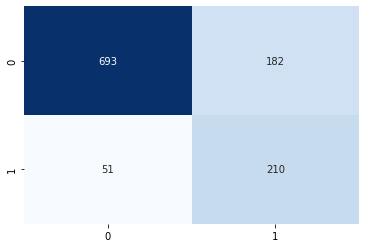

In [182]:
sns.heatmap(
    MC,
    cbar=False,
    cmap="Blues",
    annot=True,
    fmt="d",
)
plt.show()

In [183]:
accuracy=accuracy_score(y_test,y_pred)
print(accuracy)

0.7948943661971831


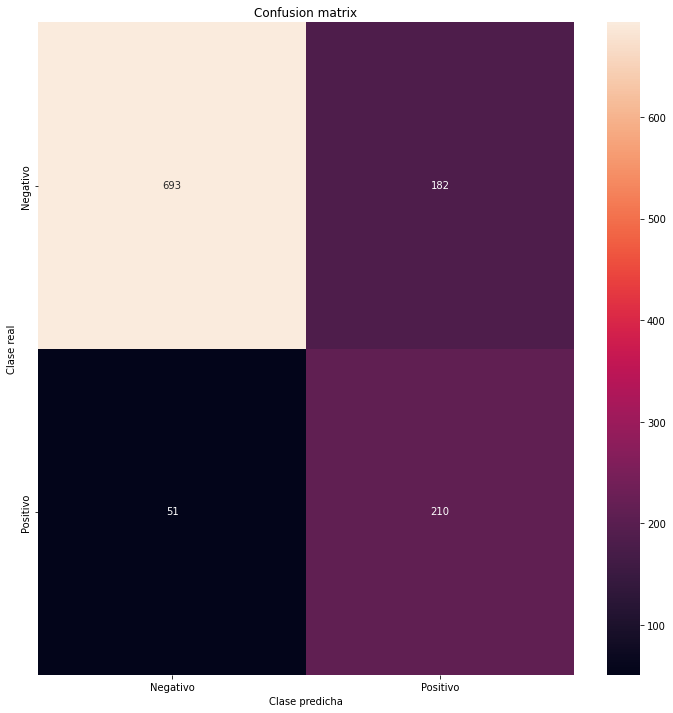

              precision    recall  f1-score   support

           0       0.93      0.79      0.86       875
           1       0.54      0.80      0.64       261

    accuracy                           0.79      1136
   macro avg       0.73      0.80      0.75      1136
weighted avg       0.84      0.79      0.81      1136



In [184]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(12, 12))
    sns.heatmap(conf_matrix, xticklabels=['Negativo','Positivo'], yticklabels=['Negativo','Positivo'], annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Clase real')
    plt.xlabel('Clase predicha')
    plt.show()
    print (classification_report(y_test, pred_y))
 
pred_y = modeloRL.predict(X_test)
mostrar_resultados(y_test, y_pred)

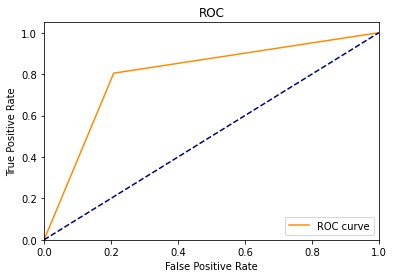

In [185]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.figure()
plt.plot(fpr, tpr, color='darkorange',
         label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
plt.show()

In [178]:
roc_auc_score(y_test, y_pred)

0.7982988505747126

In [177]:
print('El AUC,  area bajo la curva ROC es: ',roc_auc_score(y_test, y_pred))

El AUC,  area bajo la curva ROC es:  0.7982988505747126


# 17. Resultados y conclusión

Observando los resultados, podemos ver que son bastante buenos, ya que, estas métricas se evalúan sobre 1, por lo que, cuanto más cerca estén los resultados de 1, mejor será nuestro modelo. En este data, podemos ver que nuestras métricas de evaluación están entre el 0,7/0,8. Podemos observar también que tenemos un número muy bajo de FP,entoces, yo creo que este modelo es fiable. :